In [46]:
%load_ext autoreload
%autoreload 2
from Class import GetAndFormatTheData
from Class import ReturnOps
from Class import Portfolio
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
Datos = GetAndFormatTheData()
RetOp = ReturnOps()
Port = Portfolio()

In [48]:
Base = Datos.GetDataFromYahooSeveral('2017-01-01','2017-03-01','1d','Adj Close','AAPL','AMZ','MSFT')

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [49]:
BaseRet = RetOp.ComputeSeveralReturns(Base)

In [50]:
BaseRet

,AAPL,AMZ,MSFT
Date,,,
2017-01-04,-0.001168,-0.007037,-0.004538
2017-01-05,0.005128,0.010817,0.000000
2017-01-06,0.011098,0.023644,0.008611
2017-01-09,0.009206,0.012016,-0.003180
2017-01-10,0.000965,-0.002111,-0.000336
2017-01-11,0.005433,0.000198,0.009239
2017-01-12,-0.004183,0.000000,-0.009154
2017-01-13,-0.001750,0.019496,0.001344
2017-01-17,0.008066,-0.021781,-0.002684


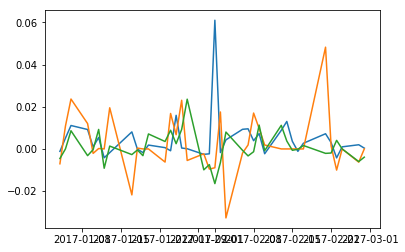

In [51]:
plt.plot(BaseRet)

In [52]:
RetOp.AnnualizingReturn(0.04,4)

0.1698585600000002

In [53]:
RetOp.MeanReturn(BaseRet)

AAPL    0.004519
AMZ     0.002538
MSFT    0.000767
dtype: float64

In [54]:
RetOp.VolReturn(BaseRet)

AAPL    0.010644
AMZ     0.013581
MSFT    0.007255
dtype: float64

In [55]:
RetOp.VolReturn(BaseRet)

AAPL    0.010644
AMZ     0.013581
MSFT    0.007255
dtype: float64

In [56]:
RetOp.kurtosis(BaseRet)

AAPL    22.090430
AMZ      5.665517
MSFT     4.399514
dtype: float64

In [57]:
RetOp.Sesgo(BaseRet)

AAPL    4.060158
AMZ     0.686352
MSFT    0.575578
dtype: float64

In [58]:
from scipy.stats import kurtosis,skew

In [59]:
kurtosis(BaseRet)+3

array([22.09043008,  5.66551709,  4.39951357])

In [60]:
skew(BaseRet)

array([4.06015804, 0.68635206, 0.57557848])

In [61]:
BaseRet.std()

AAPL    0.010644
AMZ     0.013581
MSFT    0.007255
dtype: float64

In [62]:
Draw = RetOp.drawdown(BaseRet['AAPL'])
Draw.head()

,Wealth,Previous Peak,Drawdown
Date,,,
2017-01-04,998.831881,998.831881,0.0
2017-01-05,1003.953635,1003.953635,0.0
2017-01-06,1015.095696,1015.095696,0.0
2017-01-09,1024.440651,1024.440651,0.0
2017-01-10,1025.429059,1025.429059,0.0


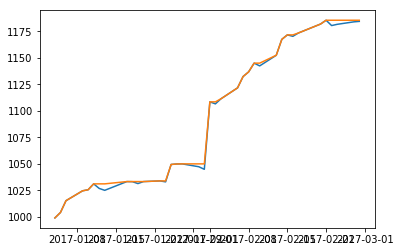

In [63]:
plt.plot(Draw[['Wealth','Previous Peak']])

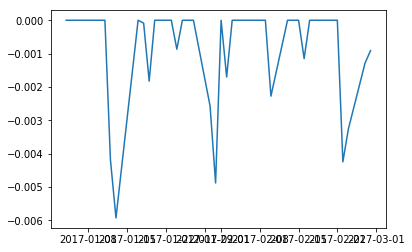

In [64]:
plt.plot(Draw['Drawdown'])

In [65]:
RetOp.AnnualizedVol(BaseRet,220)

AAPL    0.157880
AMZ     0.201432
MSFT    0.107611
dtype: float64

In [66]:
RetOp.AnnualizedMean(BaseRet,220)

AAPL    1.664845
AMZ     0.712685
MSFT    0.177148
dtype: float64

In [67]:
1000*(1+1.66)

2660.0

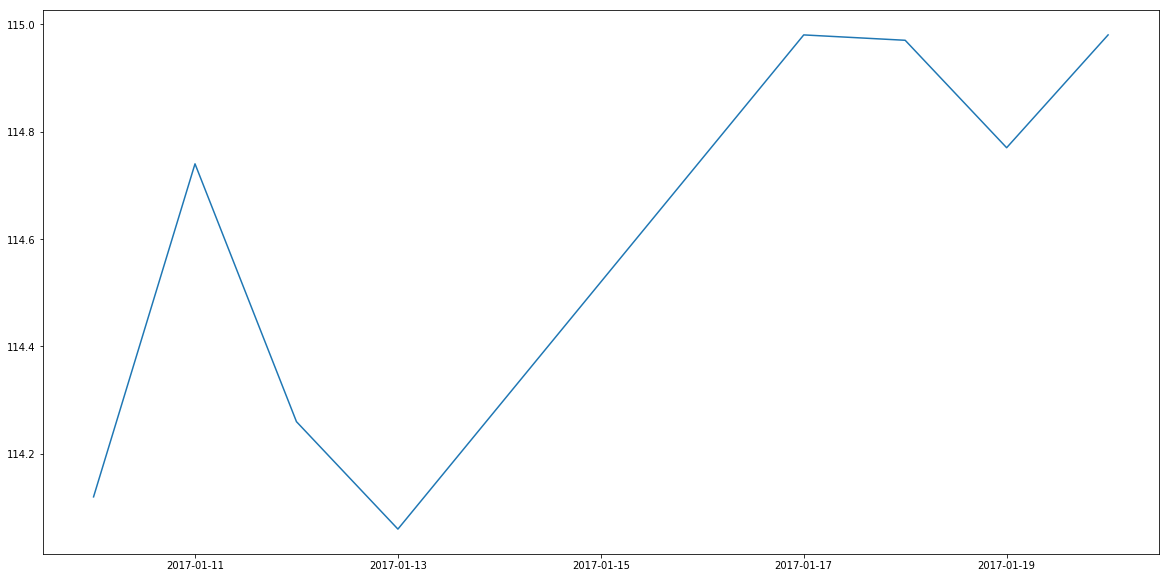

In [68]:
plt.figure(figsize=(20,10))
plt.plot(Base['2017-01-10':'2017-01-20']['AAPL'])

In [69]:
111*(1+1.66)

295.26

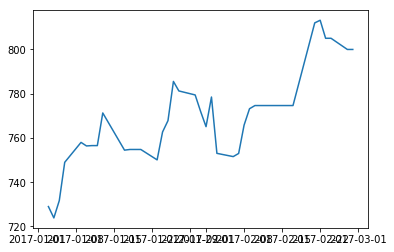

In [70]:
plt.plot(Base['AMZ'])

In [71]:
RetOp.is_normal(BaseRet['AAPL'])

False

In [72]:
RetOp.is_normal(BaseRet)

AAPL    False
AMZ     False
MSFT     True
dtype: bool

(array([20., 10.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.00424435,  0.00227796,  0.00880027,  0.01532258,  0.02184489,
         0.0283672 ,  0.03488951,  0.04141182,  0.04793413,  0.05445645,
         0.06097876]),
 <a list of 10 Patch objects>)

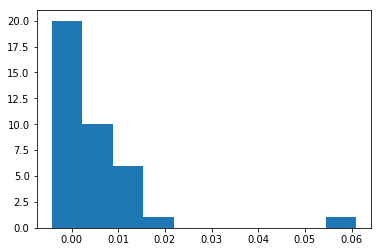

In [73]:
plt.hist(BaseRet['AAPL'])

In [74]:
RetOp.semideviation(BaseRet)

AAPL    0.001186
AMZ     0.008640
MSFT    0.003961
dtype: float64

In [75]:
RetOp.varhistoric(BaseRet)

AAPL    0.002810
AMZ     0.011786
MSFT    0.009268
dtype: float64

In [76]:
RetOp.cvarhistoric(BaseRet)

AAPL    0.004214
AMZ     0.027236
MSFT    0.013174
dtype: float64

In [77]:
RetOp.vargaussian(BaseRet)

AAPL    0.012758
AMZ     0.019504
MSFT    0.011008
dtype: float64

In [78]:
RetOp.vargaussian(BaseRet,modified=True)

AAPL   -0.006663
AMZ     0.016050
MSFT    0.009590
dtype: float64

In [79]:
RetOp.GetTheMinimunDateDraadown(BaseRet['AAPL'])

Timestamp('2017-01-13 00:00:00')

In [83]:
BaseRet.head()

,AAPL,AMZ,MSFT
Date,,,
2017-01-04,-0.001168,-0.007037,-0.004538
2017-01-05,0.005128,0.010817,0.000000
2017-01-06,0.011098,0.023644,0.008611
2017-01-09,0.009206,0.012016,-0.003180
2017-01-10,0.000965,-0.002111,-0.000336


In [84]:
Port.sharpe_ratioAnnual(BaseRet,0.1,220)

AAPL    9.016377
AMZ     2.766553
MSFT    0.652012
dtype: float64